# Homework 2 (HW2)
By the end of this homework, we expect you to be able to:

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in Python;
- Carry out simple multivariate regression analyses;
- Use techniques to control for covariates;
- Conduct an observational study and reason about its results.

---

- Homework release: Fri 17 Nov 2023	

- **Homework Due**: Fri 01 Dec 2023, 23:59	

- Grades released: Mon 11 Dec 2023	


---

## Some rules
1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)

3. Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.

4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation **(in markdown)**.

5. Back up any hypotheses and claims with data, since this is an important aspect of the course.

6. Please write all your comments in **English**, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. **If there are multiple notebooks present, we will not grade anything.**

7. We will **not run your notebook for you!** Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

8. In continuation to the previous point, interactive plots, such as those generated using the `plotly` package, should be strictly avoided!

9. Make sure to print results and/or dataframes that confirm you have properly addressed the task.


---

In [1]:
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# regression / matching
import statsmodels.formula.api as smf
import networkx as nx

# machine lerning
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder

## Context

After two years, the EPFL Baseball Club is broke. The new Dean transferred all funds to EPFL's new poster child: its super-competitive Pétanque club. After struggling so much to learn about baseball, you have unfortunately been laid off...

*(...) 1 month after, you manage to get another job (!) (...)*

Congratulations! You have just been hired as a data scientist at the Association for Computational Linguistics (ACL), a professional organization for people working on natural language processing. The ACL organizes several of the top conferences and workshops in the field of computational linguistics and natural language processing.
Your boss, Dr. Tiancheng, knows of your expertise in observational studies and asks you to investigate a question that’s been bothering everyone who has ever submitted a paper to a conference: should I spend time on writing rebuttals?



---

## Rebuttals, conferences, and getting your papers accepted

Rebuttals in ACL (Association for Computational Linguistics) conferences and in many other academic conferences are an important part of the peer-review process. They allow authors of submitted papers to respond to the reviews and comments provided by the reviewers before a final decision is made regarding the acceptance of the paper. Here's how the rebuttal process typically works in ACL conferences:

- Paper Submission: Authors submit their research papers to the ACL conference for review. These papers present novel research findings in computational linguistics, natural language processing, and related areas.
- Peer Review: The papers undergo a peer-review process after the initial submission. The program committee or reviewers are experts in the field who evaluate the papers based on their quality, significance, novelty, methodology, and other relevant criteria. They provide comments and scores for each paper.
- Rebuttal Period: After receiving the reviews, authors are given a specific period (usually around a week) to write a rebuttal. The rebuttal is a formal response to the reviewers' comments. It allows authors to clarify misunderstandings, address concerns, and provide additional information to support their paper's quality. 
- Final Review: After receiving the rebuttals, the reviewers may reconsider their initial assessments in light of the authors' responses. Reviewers may choose to maintain or adjust their reviews and scores based on the quality and effectiveness of the author's rebuttal.
- Final Decision: The program committee or conference organizers consider the initial reviews/scores, rebuttals, and revised reviews/scores to make a final decision on the acceptance of the papers. The decision can be acceptance, rejection, or conditional acceptance with a request for revisions.


---

## Data

- `tmp_id`: Unique identifier for each paper in the format "P{number}".
- `status`: Accept or Reject.
- `submission_type`: Short vs. Long (papers can have different lengths). We do not use this column in this homework. 
- `track`: Track to which the paper was submitted, broadly speaking, the "topic" of the paper.
- `scores_before`: Scores received before rebuttal. This is a nested JSON with many fields, but we will use only the "overall" score for the homework. 
- `scores_after`: Scores received after rebuttal. This is a nested JSON with many fields, but we will use only the "overall" score for the homework.
- `had_rebuttal`: True or False.


Note that: 
 - reviews are assigned numbers, e.g., "2";
 - papers can have different numbers of reviews;
 - review numbers are arbitrary, e.g., `P1` in the dataframe has two reviews numbered "2" and "3" (but no review "1").


## Task 1 (10 pts): Get to Know Your Data

As a good data scientist, you first load the data and perform some small sanity checks on it.

- You are expected to continuously alter your dataframe as you complete the tasks. E.g., if you are asked to filter the data in a specific task, continue using the filtered dataset in the subsequent tasks.
- When we tell you to "print the dataframe," make sure you print it in a way that shows the total number of rows and columns in it (`display(df)` should suffice).

**1.1** Load the dataset containing ACL reviews into memory using pandas. 
- For each paper, create columns `overall_score_before_avg` and `overall_score_after_avg` containing the average (overall) scores before and after rebuttal.
- For each paper, create columns `overall_score_before_std` and `overall_score_after_std` containing the standard deviation of the overall scores before and after the rebuttal.
- Print the four newly created columns for paper `P17`.
- Print the resulting dataframe.

**Textual Description:**

First we create two functions that take the input of the score dictionary, iterate over the overall scores and calculate the mean and std respectively. Then we apply the functions to the `scores_before` and `scores_after` column to get the final result.

Later, we display the results of columns for paper `P17` and the dataframe.

In [2]:
def get_avg(scores_dict: dict):
    overall_scores = [i["scores"]["overall_score"] for i in scores_dict.values()]
    return np.array(overall_scores).mean()

def get_std(scores_dict: dict):
    overall_scores = [i["scores"]["overall_score"] for i in scores_dict.values()]
    return np.array(overall_scores).std()

# load data
df = pd.read_json('./data/acl18_v1_numerical_final.json')

# get average
df["overall_score_before_avg"] = df["scores_before"].apply(get_avg)
df["overall_score_after_avg"] = df["scores_after"].apply(get_avg)

# get standard deviation
df["overall_score_before_std"] = df["scores_before"].apply(get_std)
df["overall_score_after_std"] = df["scores_after"].apply(get_std)

In [3]:
# print the four newly created columns for P17
df[df["tmp_id"] == "P17"][["tmp_id", "overall_score_before_avg", "overall_score_after_avg", "overall_score_before_std", "overall_score_after_std"]]

,tmp_id,overall_score_before_avg,overall_score_after_avg,overall_score_before_std,overall_score_after_std
16,P17,4.5,4.5,0.5,0.5


In [4]:
# print the dataframe
display(df)

,tmp_id,status,submission_type,track,scores_before,scores_after,had_rebuttal,overall_score_before_avg,overall_score_after_avg,overall_score_before_std,overall_score_after_std
0,P1,Reject,Long,Machine Learning,"{'2': {'scores': {'originality': 2, 'soundness...","{'2': {'scores': {'originality': 2, 'soundness...",True,2.500000,2.500000,0.500000,0.500000
1,P2,Reject,Long,Question Answering,"{'1': {'scores': {'originality': 2, 'soundness...","{'1': {'scores': {'originality': 2, 'soundness...",True,3.333333,3.333333,0.942809,0.942809
2,P3,Accept,Short,Multidisciplinary and Area Chair COI,"{'1': {'scores': {'originality': 4, 'soundness...","{'1': {'scores': {'originality': 4, 'soundness...",True,4.666667,4.666667,0.471405,0.471405
3,P4,Reject,Short,Machine Learning,"{'1': {'scores': {'originality': 2, 'soundness...","{'1': {'scores': {'originality': 2, 'soundness...",True,3.000000,2.666667,0.816497,1.247219
4,P5,Reject,Long,Document Analysis,"{'2': {'scores': {'originality': 2, 'soundness...","{'2': {'scores': {'originality': 2, 'soundness...",True,3.000000,2.500000,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
1540,P1541,Reject,Short,Textual Inference and Other Areas of Semantics,"{'1': {'scores': {'originality': 2, 'soundness...","{'1': {'scores': {'originality': 2, 'soundness...",True,2.333333,2.333333,0.471405,0.471405
1541,P1542,Reject,Long,Machine Learning,"{'1': {'scores': {'originality': 2, 'soundness...","{'1': {'scores': {'originality': 2, 'soundness...",False,2.000000,2.000000,0.816497,0.816497
1542,P1543,Reject,Long,Machine Learning,"{'1': {'scores': {'originality': 3, 'soundness...","{'1': {'scores': {'originality': 3, 'soundness...",True,2.666667,2.666667,0.942809,0.942809
1543,P1544,Reject,Short,Social Media,"{'1': {'scores': {'originality': 2, 'soundness...","{'1': {'scores': {'originality': 2, 'soundness...",False,2.000000,2.000000,0.000000,0.000000


**1.2** Create a single plot with 14 inches of width and 4 inches of height. The plot should contain two panels: 
- **Panel A**: The distribution of `overall_score_before_avg` for papers that were accepted and papers that were rejected.
- **Panel B**: The distribution of `overall_score_before_avg` for papers that had rebuttals vs. papers that did not.

**Textual Description:**

For panel A: We first devide the data based on status (Accept or Rejected), and plot the `overall_score_before_avg` using the density plot by sns.

For panel B: it is the similar process but based on `had_rebuttal`.

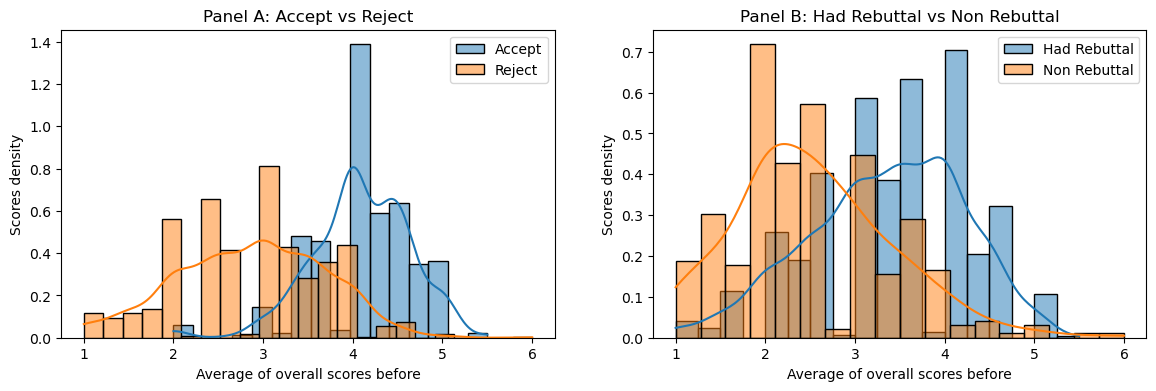

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# accepted vs. rejected score distribution
scores_accept = df[df["status"]=="Accept"]["overall_score_before_avg"]
scores_reject = df[df["status"]=="Reject"]["overall_score_before_avg"]

sns.histplot(scores_accept, kde=True, stat='density', label='Accept', ax=axes[0])
sns.histplot(scores_reject, kde=True, stat='density', label='Reject', ax=axes[0])
axes[0].set(title='Panel A: Accept vs Reject',xlabel='Average of overall scores before', ylabel='Scores density')
axes[0].legend()

# rebuttal vs. no rebuttal score distribution
scores_hadrebuttal = df[df["had_rebuttal"]==True]["overall_score_before_avg"]
scores_nonrebuttal = df[df["had_rebuttal"]==False]["overall_score_before_avg"]

sns.histplot(scores_hadrebuttal, kde=True, stat='density', label='Had Rebuttal', ax=axes[1])
sns.histplot(scores_nonrebuttal, kde=True, stat='density', label='Non Rebuttal', ax=axes[1])
axes[1].set(title='Panel B: Had Rebuttal vs Non Rebuttal',xlabel='Average of overall scores before', ylabel='Scores density')
axes[1].legend()

**1.3** **/Discuss/:** If you know a paper had a rebuttal, is it more or less likely that it was accepted? Does this mean that rebuttals help papers get accepted? Explain why or why not, providing a concrete example.

**A:**

1) Yes, if a paper had a rebuttal, it is more likely to be accepted. From the Panel B above, we can see that paper had a rebuttal tends to have higher overall scores than the paper not. And from the Panel A, we can further see higher overall scores tend to be accepted than rejected. Thus our conclusion. 

2) However, the correlation above does not necessarily mean that rebuttals help papers get accepted. 

3) For example, to some extent, rebuttals do improve papers quality by addressing reviewer concerns and clarifying misunderstandings, but other confounders may exist like `overall_scores_before_avg`. Since higher `overall_scores_before_avg` indicates a better chance of paper having a rebuttal and getting accepted. We do not know whether the correlation between `rebuttal` and `acceptance` is, because of the causation between them or `overall_scores_before_avg` confounder. Also, there can be more confounders existing like `quality` or `reviewer expertise`, etc.

**1.4** Print the percentage of rebuttals per track in the conference (defined by the `track` column). 

**/Discuss:/** Using "the logic" of hypothesis testing (see slide 29 of Lecture 4), how would you devise a statistical test to refute the following null hypothesis: all tracks have the same fraction of papers with rebuttals. Your statistical test should consider all categories at once, rather than comparing the fraction of rebuttals between pairs of categories.

**Textual Description:**

We first group the dataframe by their track and then calculate the percentage of rebuttals based on the respective data. We round up to 2 decimals for better visualization.

In [6]:
# group by track and calculate the percentage of rebuttals for each track
# round up to 2 decimals and display
display(df.groupby("track")["had_rebuttal"].mean().mul(100).round(2).astype(str) + "%")

track
Dialogue and Interactive Systems                                77.53%
Discourse and Pragmatics                                        80.43%
Document Analysis                                                73.0%
Generation                                                      77.97%
Information Extraction and Text Mining                          76.84%
Linguistic Theories Cognitive Modeling and Psycholinguistics     75.0%
Machine Learning                                                80.87%
Machine Translation                                             82.08%
Multidisciplinary and Area Chair COI                             68.0%
Multilinguality                                                 80.65%
Phonology Morphology and Word Segmentation                      85.19%
Question Answering                                              72.84%
Resources and Evaluation                                        73.24%
Sentence-level semantics                                        78.89%


**A:**

**Null hypothesis:** All tracks have the same fraction of papers with rebuttals;

**Alternative hypothesis:** At least one track have a different fraction of papers with rebuttals than others;

Initially, I would calculate the overall fraction of papers with rebuttals, `p`, by aggregating all papers without categorizing them into tracks. This `p` serves as the probability of encountering a paper with a rebuttal across any track. Then, I would assess the likelihood of the observed fractions of rebuttals within each track, assuming they adhere to the `p` probability.

A high probability suggests that the null hypothesis adequately accounts for the observed data. Conversely, a low probability indicates a discrepancy between the expected and observed rebuttal fractions within tracks. In such cases, further investigation becomes necessary to better comprehend the underlying data trends.

## Task 2 (10pts): Prediction

You decide to investigate further the effect of rebuttals on acceptance using your machine learning skills.


**2.1** For each possible value in the `track` column, create a new column called {track}-onehot (e.g., for track=Generation, create Generation-onehot). Collectively, these new columns should "one hot-encode" the track column---for instance, if for a given paper the `track` column is filled with the value "Generation", the Generation-onehot column should equal 1 and all other {track}-onehot columns should equal 0. 

Print the column names of the resulting dataframe.

**Textual description:**

First we create the one-hot columns dataframe using `pd.get_dummies` based on the `track` column of the original dataframe. Then we add suffix to the names to match the requirement and finally concatenate the two dataframes together.

In [7]:
# use get_dummies to generate one-hot columns
df_track_onehot = pd.get_dummies(df["track"], dtype=int, prefix="", prefix_sep="")

# add suffix to the names of newly created one-hot columns
df_track_onehot = df_track_onehot.add_suffix("-onehot")

# concatenate together
df = pd.concat([df, df_track_onehot], axis=1)

# print column names
print(df.columns)

Index(['tmp_id', 'status', 'submission_type', 'track', 'scores_before',
       'scores_after', 'had_rebuttal', 'overall_score_before_avg',
       'overall_score_after_avg', 'overall_score_before_std',
       'overall_score_after_std', 'Dialogue and Interactive Systems-onehot',
       'Discourse and Pragmatics-onehot', 'Document Analysis-onehot',
       'Generation-onehot', 'Information Extraction and Text Mining-onehot',
       'Linguistic Theories Cognitive Modeling and Psycholinguistics-onehot',
       'Machine Learning-onehot', 'Machine Translation-onehot',
       'Multidisciplinary and Area Chair COI-onehot', 'Multilinguality-onehot',
       'Phonology Morphology and Word Segmentation-onehot',
       'Question Answering-onehot', 'Resources and Evaluation-onehot',
       'Sentence-level semantics-onehot',
       'Sentiment Analysis and Argument Mining-onehot', 'Social Media-onehot',
       'Summarization-onehot', 'Tagging Chunking Syntax and Parsing-onehot',
       'Textual Inferenc


**2.2** Create a column `had_rebuttal_int`, which equals 1 if the paper had a rebuttal, and 0 otherwise, and a column `accepted_int`, which equals 1 if the paper was accepted, and 0 otherwise. 

**Textual Description:**

For both columns, we can directly map the bool result to 0, 1 integer cases with `astype(int)`.

In [8]:
df["had_rebuttal_int"] = df["had_rebuttal"].astype(int)
df["accepted_int"] = (df["status"] == "Accept").astype(int)

**2.3** Create a function `numpy_helper(df, cols)` to obtain a numpy.array out of your dataframe. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension `(NxM)` cast as a float.

In [9]:
def numpy_helper(df, cols):
    """
    Convert selected columns of a DataFrame to a NumPy array.

    Parameters:
    - df: the input DataFrame.
    - cols: a list of column names to be included in the resulting array.

    Returns:
    - np.array: an array of dimension (NxM), where N is the number of rows and M is the number of selected columns.
    """
    selected_columns = df[cols].to_numpy(dtype=float)
    return selected_columns.squeeze()


**2.4**
Create:
- an array of features X containing all track one-hot features, as well as the `overall_score_before_avg`,`overall_score_before_std`, and `had_rebuttal_int`;
- an array of outcomes y containing `accepted_int`. 


Print the shapes of both X and y (e.g., `X.shape`).

**Textual Description:**

Construct the feature columns based on one-hot features and the features mentioned above. We use our function created above to extract them into numpy.array.

In [10]:
# Selecting the columns for features (X) and outcome (y)
feature_cols = df_track_onehot.columns.to_list()
feature_cols.extend(['overall_score_before_avg', 'overall_score_before_std', 'had_rebuttal_int'])

X = numpy_helper(df, feature_cols)
y = numpy_helper(df, ["accepted_int"])

# print shape
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1538, 24)
Shape of y: (1538,)



**2.5** Build two `GradientBoostingClassifier` models using `sklearn` using the default parameters:
- Model 1: predicts the outcome `accepted_int` using the onehot encoded features related to track, as well as the `overall_score_before_avg`,`overall_score_before_std`.
- Model 2:  predicts the outcome `accepted_int` using the onehot encoded features related to track, as well as the `overall_score_before_avg`,`overall_score_before_std` **and** `had_rebuttal_int`.


For both models:

- Use the `cross_validate` function from `sklearn.model_selection` to compute the average precision, recall, and accuracy across test cross validation splits.

    - e.g., `cross_validate(clf, X, y, cv=30, scoring=('accuracy', 'precision', 'recall'))`

**Textual Description:**

Use `GradientBoostingClassifier` and `cross_validate` to examine the evaluating metrics for model 1 that is trained without `had_rebuttal_int` and model 2 that is trained with.

In [11]:
# function to display the evaluation results
def get_eval(eval_dict):
    avg_acc = eval_dict["test_accuracy"].mean()
    avg_p = eval_dict["test_precision"].mean()
    avg_r = eval_dict["test_recall"].mean()
    return "accuracy is %.3f, precision is %.3f, recall is %.3f"%(avg_acc, avg_p, avg_r)

# Creating GradientBoostingClassifier models
clf = GradientBoostingClassifier()
# Cross-validation for Model 1
eval_dict1 = cross_validate(clf, X[:,:-1], y, cv=30, scoring=('accuracy', 'precision', 'recall'))  
# Cross-validation for Model 2
eval_dict2 = cross_validate(clf, X, y, cv=30, scoring=('accuracy', 'precision', 'recall'))

# Displaying the results
print("For model 1: " + get_eval(eval_dict1))
print("For model 2: " + get_eval(eval_dict2))

For model 1: accuracy is 0.837, precision is 0.709, recall is 0.593
For model 2: accuracy is 0.839, precision is 0.713, recall is 0.596



**2.6** Determine whether the difference in accuracy of the two models is statistically significant.


**Textual Description:**

Here we import `scipy.stats` to do a statistical test to determine if there is a difference between the accuracy of the two models.

In [12]:
import scipy.stats as stats

acc1 = eval_dict1["test_accuracy"]
acc2 = eval_dict2["test_accuracy"]

t_stat, p_value =  stats.ttest_ind(acc1, acc2, alternative='two-sided', equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("The difference in accuracy is statistically significant.")
else:
    print("The difference in accuracy is not statistically significant.")

T-statistic: -0.1291661307585383
P-value: 0.8976766984217135
The difference in accuracy is not statistically significant.


**2.7** Contrast the results obtained in **2.6** with what you observed in **Task 1**. What advantage did the analyses in **2.6** have?

**A:**

1) Results in __2.6__ shows that whether to include the rebuttal information does not influence the prediction result of wheter a paper is accepted, indicating whether the paper had rebuttal or not have nothing to do with its final acceptance status. This is in contrary to what the plots seem to suggest in __Task 1__.

2) Analysis in __2.6__ has an advantage that there is a statistical significant number assigned to the test to support its conclusion. The analysis is more quantitative in contrast to qualitative in this case, which makes it stronger.

## Task 3 (12pts): Interlude



**3.1** Using the formula API from `statsmodels`, estimate the following linear regressions. Report the summary of the models.
- `accepted_int ~ had_rebuttal_int`,  
- `accepted_int ~ overall_score_after_avg`
- `had_rebuttal_int ~ overall_score_before_avg`

In [13]:
# Regression 1: accepted_int ~ had_rebuttal_int
model1 = smf.ols(formula="accepted_int ~ had_rebuttal_int", data=df)
res1 = model1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:           accepted_int   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     66.22
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           8.24e-16
Time:                        17:30:05   Log-Likelihood:                -855.16
No. Observations:                1538   AIC:                             1714.
Df Residuals:                    1536   BIC:                             1725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0838      0.023  

In [14]:
# Regression 2: accepted_int ~ overall_score_after_avg
model2 = smf.ols(formula="accepted_int ~ overall_score_after_avg", data=df)
res2 = model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:           accepted_int   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     1031.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          1.58e-173
Time:                        17:30:05   Log-Likelihood:                -492.65
No. Observations:                1538   AIC:                             989.3
Df Residuals:                    1536   BIC:                             1000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [15]:
# Regression 3: had_rebuttal_int ~ overall_score_before_avg
model3 = smf.ols(formula="had_rebuttal_int ~ overall_score_before_avg", data=df)
res3 = model3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:       had_rebuttal_int   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     240.2
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.89e-50
Time:                        17:30:05   Log-Likelihood:                -727.42
No. Observations:                1538   AIC:                             1459.
Df Residuals:                    1536   BIC:                             1470.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               


**3.2** **/Discuss:/** Interpret the coefficients associated with the binary independent variable in the above models. Note that independent variables are the ones on the right-handside of the equation.

- e.g., in `had_rebuttal_int ~ overall_score_before_avg`, `overall_score_before_avg` is the independent variable.



**A:**

- **Model 1:** `accepted_int = 0.0838 + 0.2098 * had_rebuttal_int`
    * Intercept: The coefficient of the intercept is 0.0838, which suggests that when had_rebuttal_int is 0 (indicating no rebuttal), the expected value of accepted_int is 0.0838 (meaning the paper is not likely to get accepted).
    * Coefficient of had_rebuttal_int: The coefficient is 0.2098, indicating that, all else being equal, having a rebuttal (had_rebuttal_int = 1) is associated with an increase in the expected value of accepted_int by 0.2098, which means more likely to be accepted. 
- **Model 2:** `accepted_int =  -0.6558 + 0.2860 * overall_score_after_avg`
    * Intercept: The coefficient of the intercept is -0.6558. This can be interpreted as the expected value of accepted_int when overall_score_after_avg is 0, which in this context might not have a meaningful interpretation since the score would not be expected to be zero.
    * Coefficient of overall_score_after_avg: The coefficient is 0.2860, which suggests that for each unit increase in overall_score_after_avg, the expected value of accepted_int increases by about 0.2860.
- **Model 3:** `had_rebuttal_int = 0.2527 +  0.1651 * overall_score_before_avg`
    * Intercept: The coefficient of the intercept is 0.2527, which would be the expected value of had_rebuttal_int when overall_score_before_avg is 0. Again, since the score is unlikely to be zero, this may not have a practical interpretation.
    * Coefficient of overall_score_before_avg: The coefficient is 0.1651, indicating that for each unit increase in overall_score_before_avg, the expected value of had_rebuttal_int increases by about 0.1651.


**3.3** **/Discuss:/** describe three correlations you can draw from the previous analysis. Describe their sign (i.e., whether they are positive or negative), and whether they are statistically significant (at the .05 level of significance).


**A:**

Since all the coefficients for the independent variables are positive, we can conclude that all three pairs of variables, i.e. `accepted_int ~ had_rebuttal_int`, `accepted_int ~ overall_score_after_avg`, `had_rebuttal_int ~ overall_score_before_avg`, are positively correlated. And the p-values are all 0, indicating the correlations are all statistically significant.

**3.4** **/Discuss:/** Is the following statement True or False? Justify. 

- The variable `overall_score_after_avg` explains more of the variance in `accepted_int`than the variable `overall_score_before_avg` explains of `had_rebuttal_int`.


**A:**

The R-squared value indicates the proportion of the variance in the dependent variable that is predictable from the independent variable. 

Therefore, to determine if the statement is True or False, compare the R-squared values in the summary of both models.

And our answer is __True__, since the R-squared value for relationship `accepted_int ~ overall_score_after_avg` is `0.402` which is higher than that of relationship `had_rebuttal_int ~ overall_score_before_avg` (`0.135`), indicating the former explains more variance.


**3.5** **/Discuss:/** Create a causal diagram relating the following variables:
- "Sa": `overall_score_after_avg`
- "Sb": `overall_score_before_avg`
- "Re": `had_rebuttal_int`
- "Ac": `accepted_int`
- "Tr": `track`


When unsure about whether a causal relationship exists, include it in the diagram. E.g., include the arrow corresponding to the key questions around this homework, i.e., `had_rebuttal_int`->`accepted_int`, even though you are investigating whether it exists. 

You may draw your diagram using text, use Sa/Sb/Re/Ac/Tr to represent the names of the variables, and simply indicate the causal links, one per line.


Instead of drawing something like this:
![](./dagv.jpeg)

Simply write:

- Tr->Sb
- Tr->Ac
- Tr->Re
- Ac->Sb
- Re->Sb
- Sb->Sa

---

**A:**

- Tr -> Ac
- Sb -> Sa
- Sb -> Re
- Sb -> Ac
- Re -> Sa
- Re -> Ac
- Sa -> Ac

**3.6** **/Discuss:/** What is the problem of simply comparing the outcomes of papers that had rebuttals with those that did not? Give a concrete example.

**A:**

The problem is that there might be one or more confounders existing in the relationship of `had_rebuttal_int` to `accept_int`. And the causal conclusion we get may be spurious. 

One example of the confounder is `overall_score_before_avg`, since there are positive correlations between `overall_score_before_avg` and `had_rebuttal_int`, and `overall_score_before_avg` and `accept_int`. We may see that the increasing `overall_score_before_avg` would both cause `had_rebuttal_int` and `accept_int` to increase, which seems like there is a postive correlation between `had_rebuttal_int` and `overall_score_before_avg`, but there's acutally no causality between them. 

So to obtain a more precise analysis, we need to balance the data to control the influence of the confounders first.

# Task 4 (12 pts): Observational study

You decide to use your observational study skills to obtain a concrete answer to the question: do rebuttals increase acceptance?

 **4.1** Perform exact one-to-one matching considering the `score_before_avg` and the `track` variables. Each paper that had a rebuttal ("treatment group") should be matched to a paper that did not have a rebuttal ("control group"). 
- Your matching should be optimal, i.e., the maximum amount of papers possible must be matched. 
- Print the dataframe of papers in the matched sample

**Textual Description:**

For every corresponding pair of records within the control and treatment groups, we construct an edge, iff they have the same `track` and `overall_score_before_avg`. The weights of the edges can be any constant, so we assign 1 here. Following this, we proceed to match the nodes within the graph using the `max_weight_matching` fucntion and obtain the balanced data.

In [16]:
# Separate the treatment and control groups
treated = df[df["had_rebuttal"] == True]
control = df[df["had_rebuttal"] == False]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control.iterrows():
    for treatment_id, treatment_row in treated.iterrows():
        
        # Ensure the come from the same track and have the same overall_score_before_avg
        if control_row["track"] == treatment_row["track"] \
            and control_row["overall_score_before_avg"]== treatment_row["overall_score_before_avg"]:
            # Assign the similarity to 1 since we do a exact matching here, any constant should be fine
            similarity = 1
            # Add an edge between the two instances weighted by the similarity between them
            G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matched_pairs = nx.max_weight_matching(G)

In [17]:
# Flatten the matched_pairs and print the result dataframe
matched_idx = np.array(list(matched_pairs)).flatten()
matched_df = df.loc[matched_idx]
display(matched_df)

,tmp_id,status,submission_type,track,scores_before,scores_after,had_rebuttal,overall_score_before_avg,overall_score_after_avg,overall_score_before_std,...,Sentence-level semantics-onehot,Sentiment Analysis and Argument Mining-onehot,Social Media-onehot,Summarization-onehot,Tagging Chunking Syntax and Parsing-onehot,Textual Inference and Other Areas of Semantics-onehot,Vision Robotics Multimodal Grounding and Speech-onehot,Word-level Semantics-onehot,had_rebuttal_int,accepted_int
1387,P1388,Reject,Long,Question Answering,"{'1': {'scores': {'originality': 3, 'soundness...","{'1': {'scores': {'originality': 3, 'soundness...",True,2.500000,3.000000,0.500000,...,0,0,0,0,0,0,0,0,1,0
890,P891,Reject,Long,Question Answering,"{'1': {'scores': {'originality': 3, 'soundness...","{'1': {'scores': {'originality': 3, 'soundness...",False,2.500000,2.500000,0.500000,...,0,0,0,0,0,0,0,0,0,0
1301,P1302,Reject,Long,Multidisciplinary and Area Chair COI,"{'1': {'scores': {'originality': 2, 'soundness...","{'1': {'scores': {'originality': 2, 'soundness...",True,2.666667,2.666667,1.247219,...,0,0,0,0,0,0,0,0,1,0
676,P677,Reject,Short,Multidisciplinary and Area Chair COI,"{'1': {'scores': {'originality': 3, 'soundness...","{'1': {'scores': {'originality': 3, 'soundness...",False,2.666667,2.666667,0.471405,...,0,0,0,0,0,0,0,0,0,0
1068,P1069,Accept,Long,Summarization,"{'2': {'scores': {'originality': 4, 'soundness...","{'2': {'scores': {'originality': 4, 'soundness...",True,5.000000,4.500000,0.000000,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,P253,Reject,Long,Sentence-level semantics,"{'2': {'scores': {'originality': 3, 'soundness...","{'2': {'scores': {'originality': 3, 'soundness...",True,2.000000,2.000000,0.000000,...,1,0,0,0,0,0,0,0,1,0
1128,P1129,Accept,Short,Discourse and Pragmatics,"{'3': {'scores': {'originality': 3, 'soundness...","{'3': {'scores': {'originality': 3, 'soundness...",True,3.000000,3.000000,0.000000,...,0,0,0,0,0,0,0,0,1,1
660,P661,Reject,Long,Discourse and Pragmatics,"{'1': {'scores': {'originality': 2, 'soundness...","{'1': {'scores': {'originality': 2, 'soundness...",False,3.000000,3.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
542,P543,Accept,Long,Linguistic Theories Cognitive Modeling and Psy...,"{'1': {'scores': {'originality': 4, 'soundness...","{'1': {'scores': {'originality': 4, 'soundness...",True,3.500000,4.333333,0.500000,...,0,0,0,0,0,0,0,0,1,1


**4.2** So far, we did not consider the `score_before_std` variable. One could argue that the variance in the scores makes a difference. E.g., a paper that received scores 1 and 5, might be very different from a paper with scores 3 and 3. 

Note that you did not match on the `score_before_std` variable. However, it suffices if this variable is "balanced" across treatment and control groups.
 Use the Standardized Mean Difference (SMD) to assess whether that's the case.

- The standardized mean difference for a variable $x$ and two groups $t$ and $c$ is defined as: $\frac{| E[x_t] - E[x_c] |}{\sqrt{Var[x_t] + Var[x_c]}}$

- Note that a Standardized Mean Difference smaller than 0.1 suggests that variables are balanced across treatment and control groups.


**Textual Description:**

Get the `overall_score_before_std` for both control and treatment, and calculate the standard mean difference according to the formula.

In [18]:
# extract control and treated index
control_idx = [i[0] for i in matched_pairs]
treated_idx = [i[1] for i in matched_pairs]

# get std score for the two groups
control_scores_std = matched_df.loc[control_idx, "overall_score_before_std"]
treated_scores_std = matched_df.loc[treated_idx, "overall_score_before_std"]

# calculate standard mean difference
smd = np.abs(control_scores_std.mean() - treated_scores_std.mean()) \
      / np.sqrt(control_scores_std.var() + treated_scores_std.var())
print(smd)

0.01766557677478707


**A:**

Since the SMD is smaller than 0.1, the `score_before_std` is already balanced between the two groups and we do not need to match it additionally.


**4.3** Using the matched sample, estimate the following linear regression: `accepted ~ had_rebuttal_int`.


In [19]:
# run linear regression based on the matched data
matched_model = smf.ols(formula="accepted_int ~ had_rebuttal_int", data=matched_df)
matched_res = matched_model.fit()
print(matched_res.summary())

                            OLS Regression Results                            
Dep. Variable:           accepted_int   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.07696
Date:                Fri, 01 Dec 2023   Prob (F-statistic):              0.782
Time:                        17:30:11   Log-Likelihood:                -132.72
No. Observations:                 542   AIC:                             269.4
Df Residuals:                     540   BIC:                             278.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1033      0.019  


**4.4** **/Discuss:/**

i. Considering your results obtained in 4.3, and the causal diagram drawn in Task 3: do rebuttals increase the chance of a paper getting accepted? Why are results different from what you obtained in **Task 1?**

ii. Why is there no need to include other covariates (e.g., score before) in the regression?

**A:**

1) Given the p-value (0.782) of the variable `had_rebuttal_int` is larger than 0.05, we may conclude that there is no statistically significant relations between `had_rebuttal_int` and `accept_int`. (Additionally, the coefficient of `had_rebuttal_int`(0.0074) is very small to ignore.) The results are different since we balance the confounders of `track` and `overall_score_before_avg` over our control and treatment groups. So the conclusion we obtain now is more precise. 

2) Because we already controled their influence in the observational study by matching them in the previous steps. So we assume it is already balanced across two groups in terms of other covariates (e.g. score before) and do not need to include them in the regression.

**4.5** **/Discuss:/** Imagine there is another, unobserved variable "quality" which captures the true quality of the paper. Suppose quality ("Qu") is connected to the DAG you drew in the following ways:
- Qu -> Sa
- Qu -> Sb
- Qu -> Re
- Qu -> Ac
Assume that
- quality can only increase the chances of rebuttals;
- quality and the rebuttal can only increase the chance of a paper being accepted.
Does this uncontrolled confounder threaten the validity of your findings?


**A:**

__No__, since we know that the correlations between `quality -> rebuttals`, `quality -> acceptance`, and `quality -> acceptance` are all positive. So even though the confounder `quality` really affects, it would only create a spurious positive correlation between `rebuttal_int` and `accept_int`. But since we already conclude that such correlation does not exist, so our conclusion stands the same despite this uncontrolled confounder.